### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


<a href='https://yadi.sk/d/KA6GgQAAzMnT-g'>processed_data</a>  
<a href='https://yadi.sk/d/W3dhYgu5EQOifQ'>taxi_dataset</a>

In [ ]:
processed_data = pd.read_csv('processed_data.csv', index_col='id')
processed_data.head()

In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [3]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [76]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [4]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [78]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

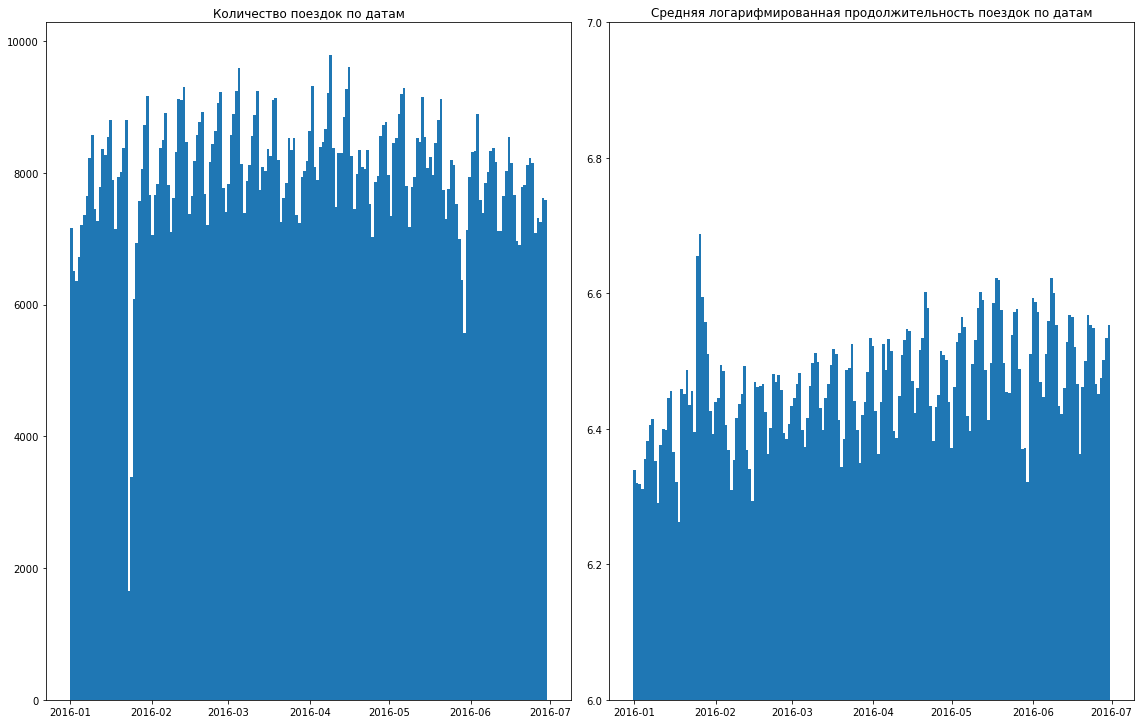

In [9]:
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
#plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


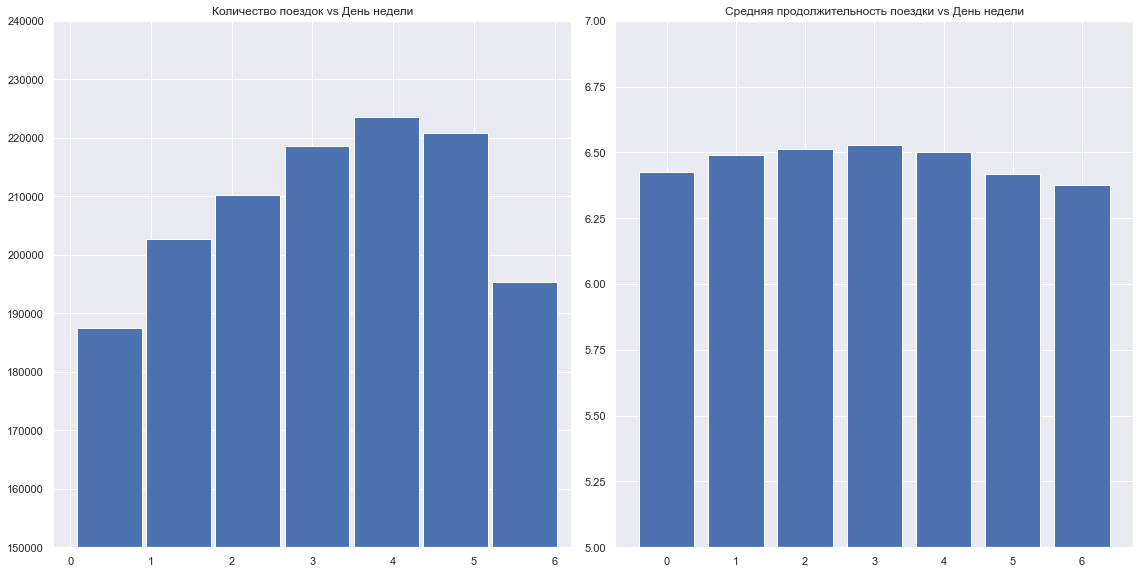

In [88]:
#Количество поездок/Средняя продолжительность поездки vs День недели
df = processed_data.groupby(processed_data['day_of_week'])['log_trip_duration'].agg(['mean', 'count'])

fig = plt.figure()

fig.set_size_inches(16, 8)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins = processed_data['day_of_week'].unique().shape[0], rwidth = 0.8,
        width=0.8)
plt.ylim((150000, 240000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(df.index)), df['mean'])
plt.ylim((5, 7))


fig.tight_layout()

ax_1.set(title = 'Количество поездок vs День недели')
ax_2.set(title = 'Средняя продолжительность поездки vs День недели'  )

plt.show()

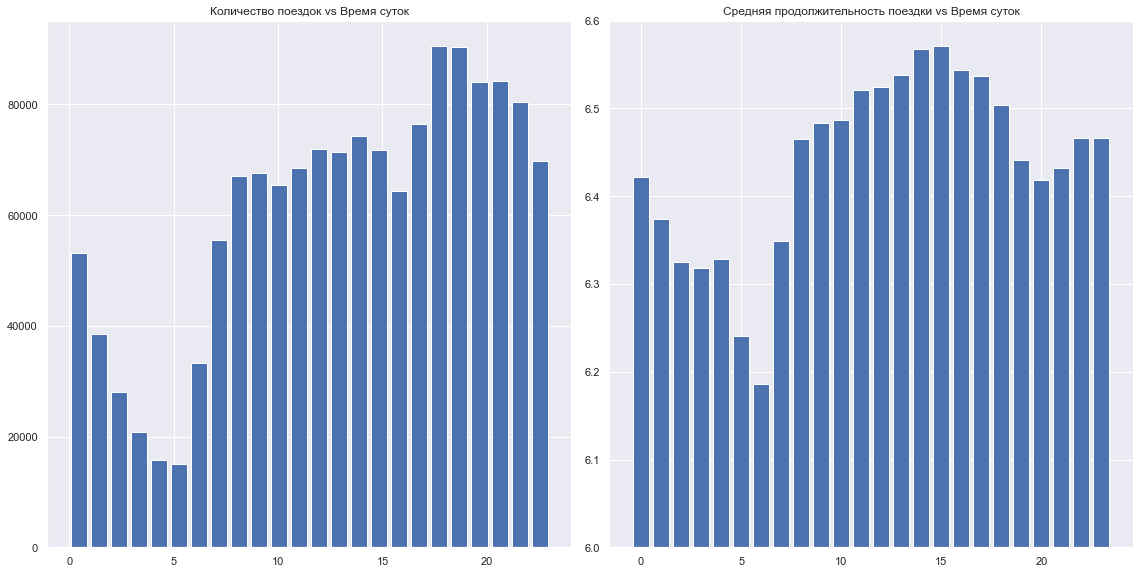

In [92]:
#Количество поездок/Средняя продолжительность поездки vs время суток
df_hour = processed_data.groupby(processed_data['hour'])['log_trip_duration'].agg(['mean','count'])

fig = plt.figure()

fig.set_size_inches(16, 8)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins = processed_data['hour'].unique().shape[0], rwidth = 0.8)

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(df_hour.index)), df_hour['mean'])
plt.ylim((6, 6.6))
fig.tight_layout()

ax_1.set(title = 'Количество поездок vs Время суток')
ax_2.set(title = 'Средняя продолжительность поездки vs Время суток')

plt.show()

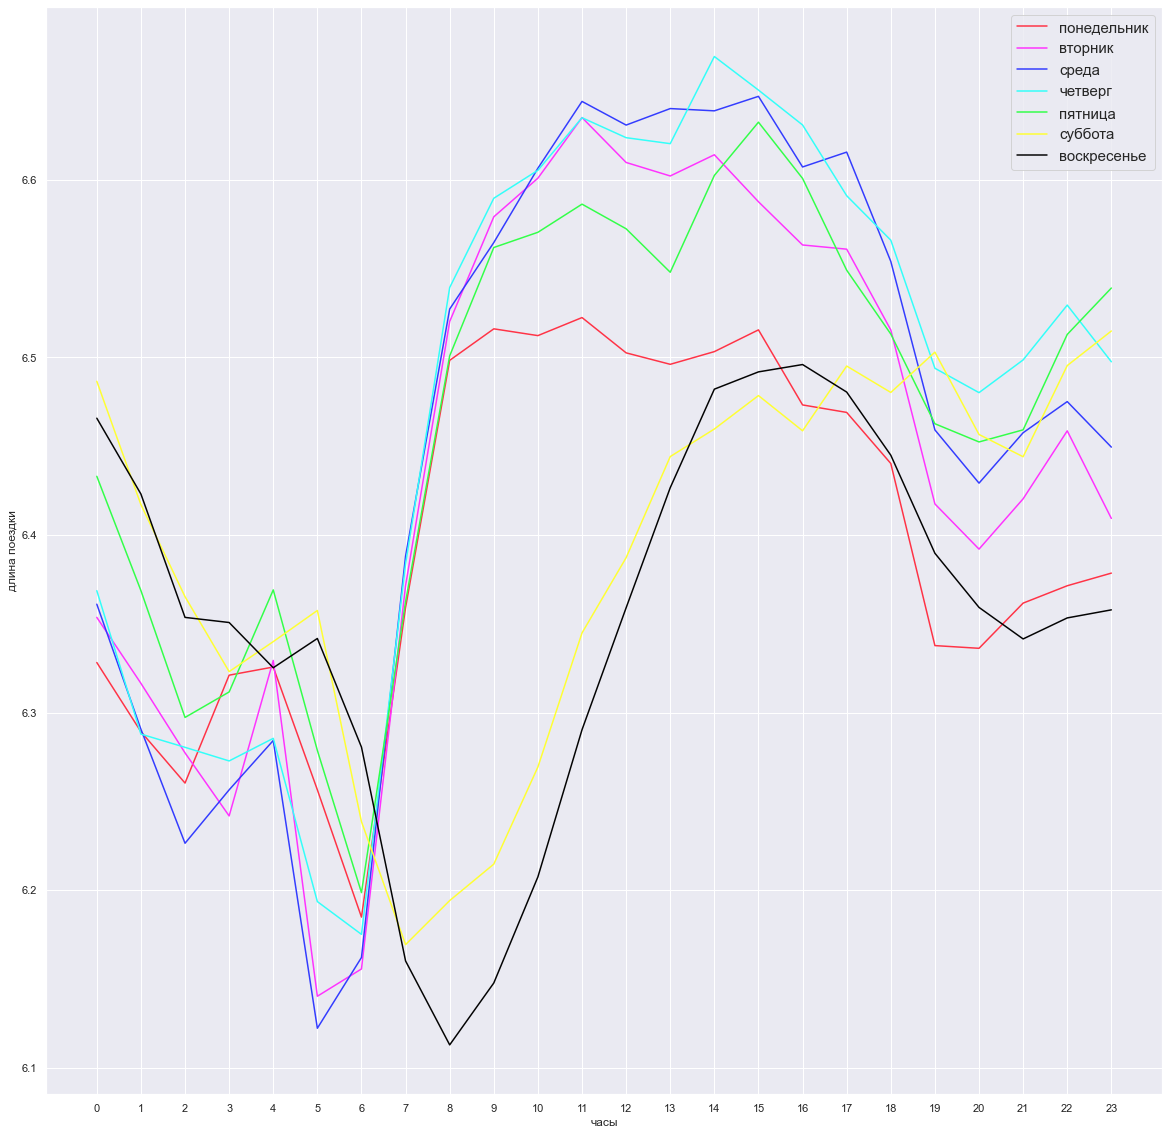

In [77]:
#Средняя продолжительность поездки vs время суток для каждого дня недели 
fdfdfd = processed_data.groupby(['hour', 'day_of_week'], as_index = False)['log_trip_duration'].mean()
#colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
colors = ['#FF3346', '#FF33FF', '#333CFF', '#33FFF9', '#33FF49', '#FFFF33', '#030303']
plt.rcParams['figure.figsize']=20,20
sns.set_theme(style="darkgrid")
q = sns.lineplot(data = fdfdfd, x = 'hour' , y ='log_trip_duration', hue =  'day_of_week', palette=colors)
q.set_xticks(fdfdfd['hour'].unique())
q.set_xlabel('часы')
q.set_ylabel('длина поездки')
q.legend(['понедельник', "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"], fontsize=15)
plt.show()

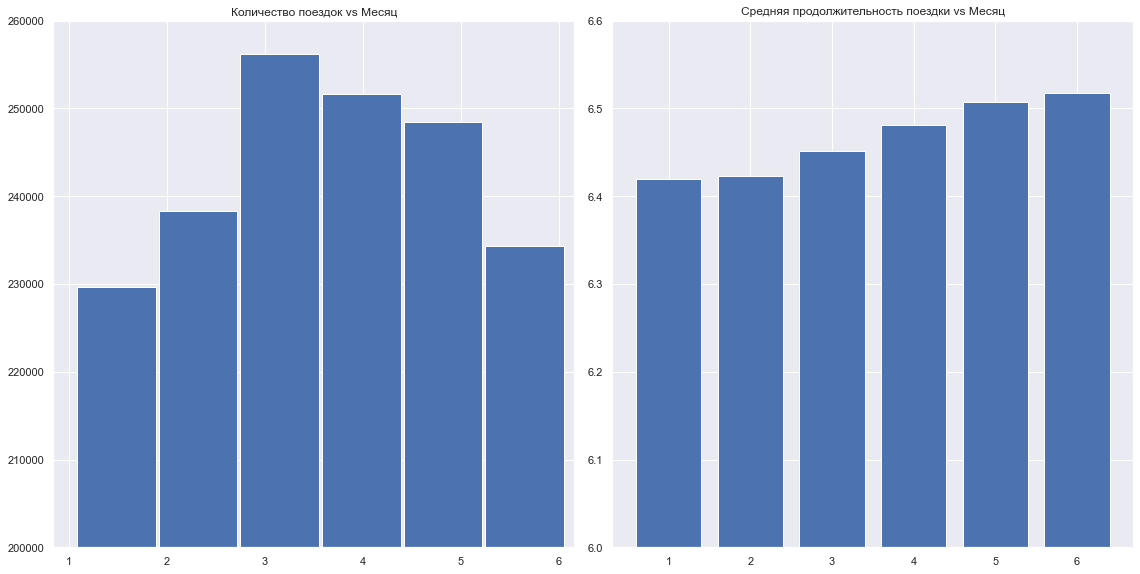

In [93]:
#Количество поездок/Средняя продолжительность поездки vs Месяц
df_month = processed_data.groupby(processed_data['month'])['log_trip_duration'].agg(['mean', 'count'])

fig = plt.figure()

fig.set_size_inches(16, 8)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins = processed_data['month'].unique().shape[0], rwidth = 0.8,
        width=0.8)
plt.ylim((200000, 260000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(df_month.index)), df_month['mean'])
plt.ylim((6, 6.6))


fig.tight_layout()

ax_1.set(title = 'Количество поездок vs Месяц')
ax_2.set(title = 'Средняя продолжительность поездки vs Месяц'  )

plt.show()

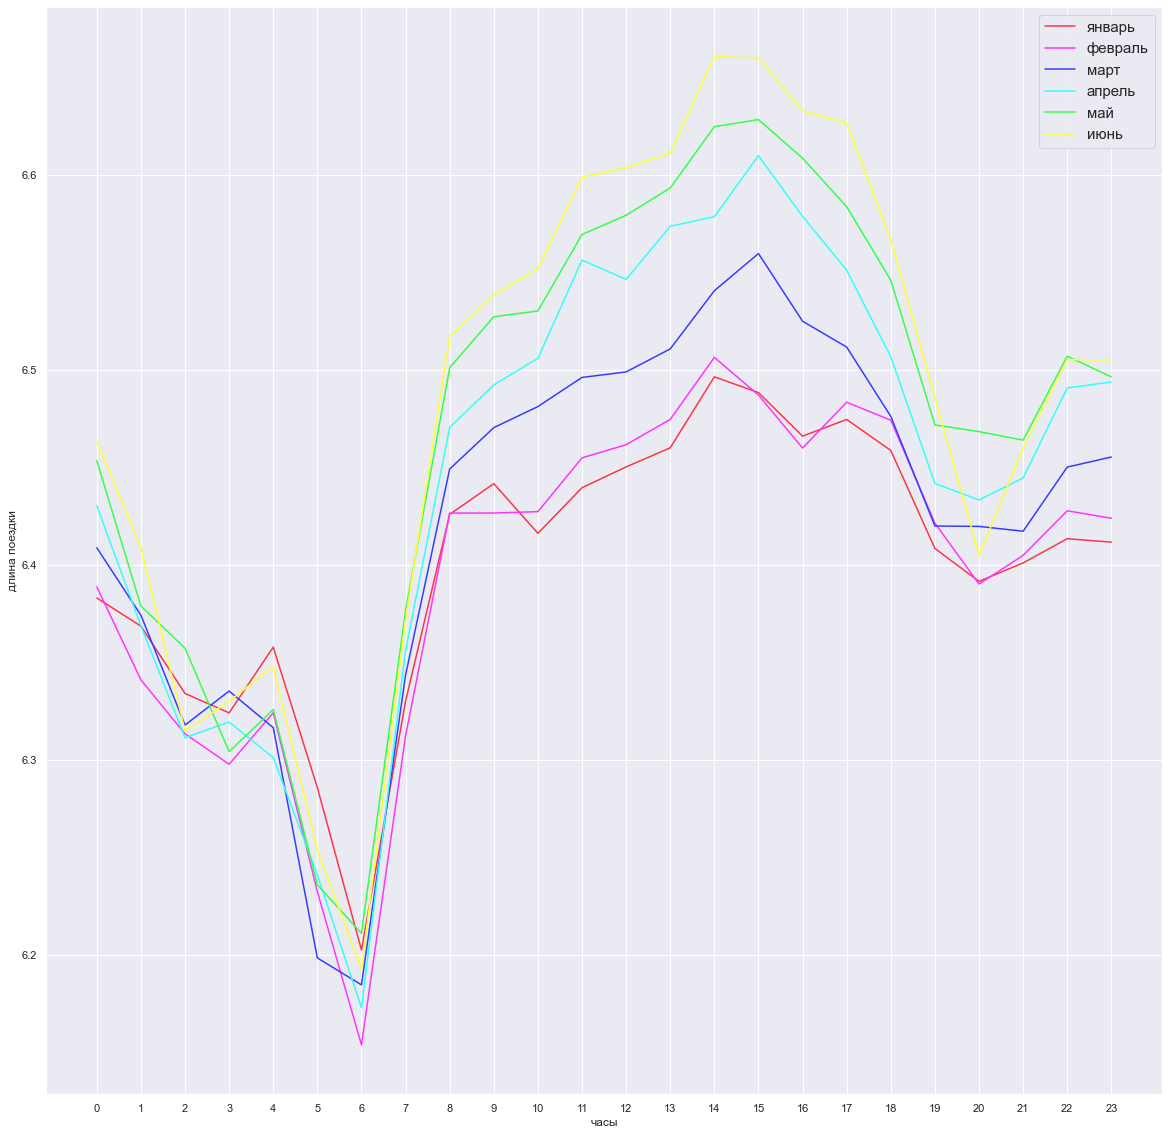

In [74]:
#Средняя продолжительность поездки vs время суток для каждого месяца
fdfdfd_month = processed_data.groupby(['hour', 'month'], as_index = False)['log_trip_duration'].mean()

colors = ['#FF3346', '#FF33FF', '#333CFF', '#33FFF9', '#33FF49', '#FFFF33']
plt.rcParams['figure.figsize']=20,20
sns.set_theme(style="darkgrid")
q = sns.lineplot(data = fdfdfd_month, x = 'hour' , y ='log_trip_duration', hue =  'month', palette=colors
                 )
q.set_xticks(fdfdfd_month['hour'].unique() )
q.set_xlabel('часы')
q.set_ylabel('длина поездки')
q.legend( ['январь', 'февраль','март','апрель','май','июнь'], fontsize=15)
plt.show()

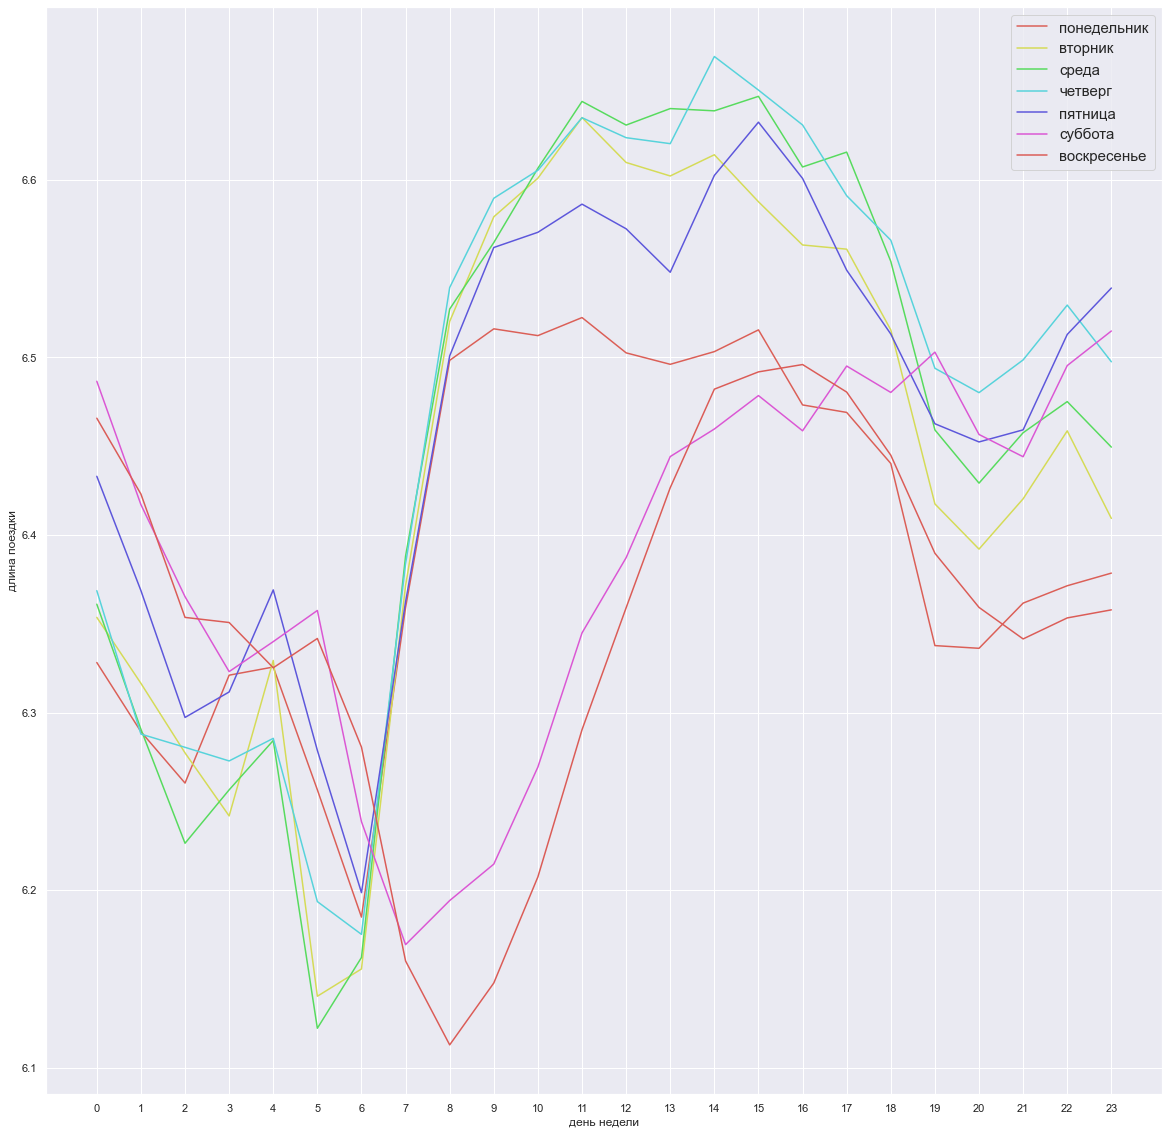

In [115]:
#Средняя продолжительность поездки vs время суток для каждого месяца
fdfdfd_month_d = processed_data.groupby(['hour', 'day_of_week'], as_index = False)['log_trip_duration'].mean()

#colors = ['#FF3346', '#FF33FF', '#333CFF', '#33FFF9', '#33FF49', '#FFFF33']
plt.rcParams['figure.figsize']=20,20
sns.set_theme(style="darkgrid")
q = sns.lineplot(data = fdfdfd_month_d, x = 'hour' , y ='log_trip_duration', hue =  'day_of_week', palette='hls' )
q.set_xticks(fdfdfd_month_d['hour'].unique() )
q.set_xlabel('день недели')
q.set_ylabel('длина поездки')
q.legend( ['понедельник', 'вторник','среда','четверг','пятница','суббота', "воскресенье"], fontsize=15)
plt.show()

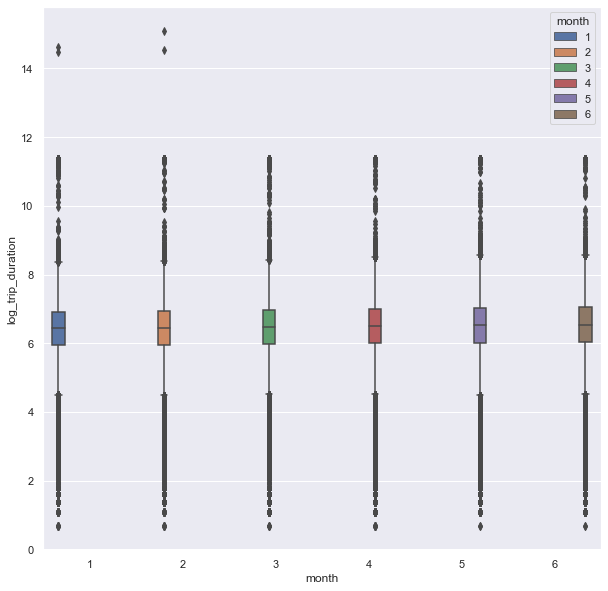

In [95]:
#распределение по месяцам
plt.rcParams['figure.figsize']=10,10
box_1 = sns.boxplot(data = processed_data, x = 'month' , y ='log_trip_duration', hue =  'month' )

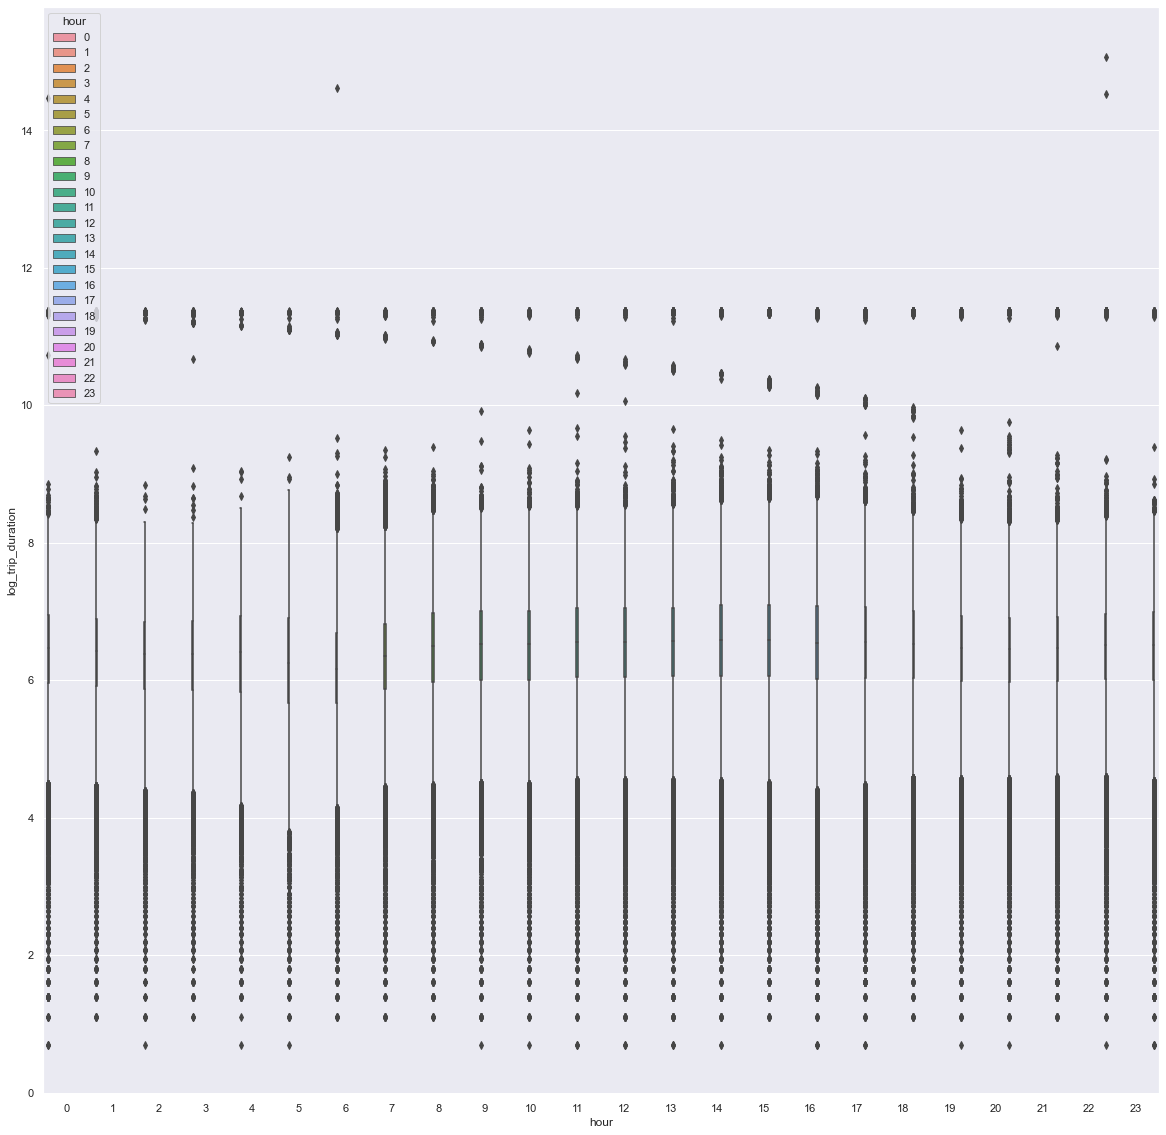

In [97]:
plt.rcParams['figure.figsize']=20,20
box_1 = sns.boxplot(data = processed_data, x = 'hour' , y ='log_trip_duration', hue =  'hour' )

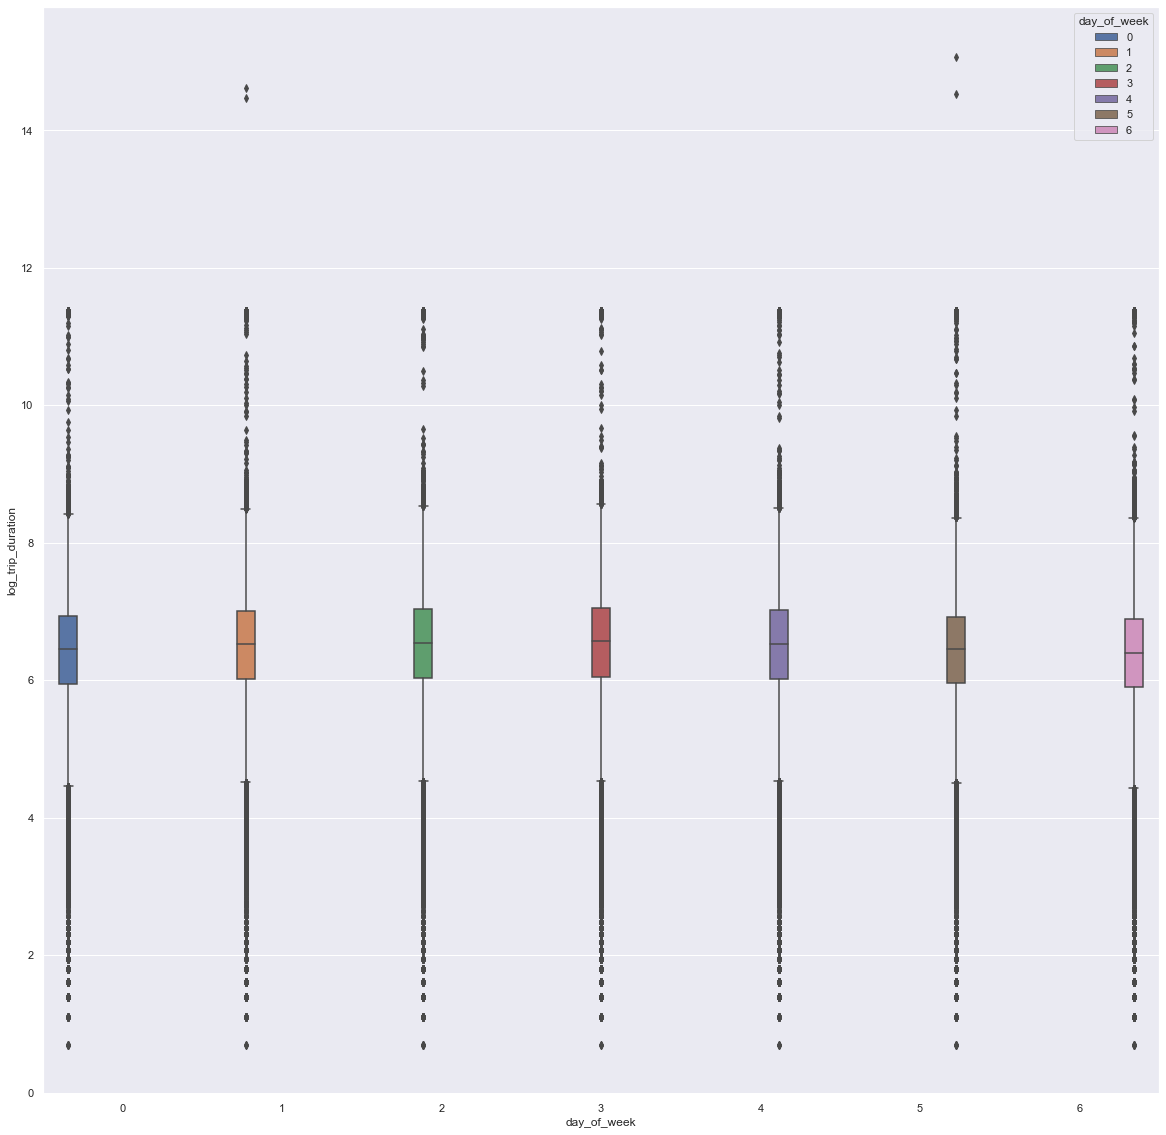

In [98]:
plt.rcParams['figure.figsize']=20,20
box_1 = sns.boxplot(data = processed_data, x = 'day_of_week' , y ='log_trip_duration', hue =  'day_of_week' )

In [112]:
heat = processed_data.groupby(['hour', 'day_of_week', 'month'], as_index = False)['log_trip_duration'].count()

heat.corr()


,hour,day_of_week,month,log_trip_duration
hour,1.000000e+00,1.883901e-17,4.591279e-17,0.682593
day_of_week,1.883901e-17,1.000000e+00,1.547810e-18,0.056498
month,4.591279e-17,1.547810e-18,1.000000e+00,0.022089
log_trip_duration,6.825929e-01,5.649772e-02,2.208867e-02,1.000000


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [5]:
### Создадим первый бинарный признак
processed_data['anomaly'] = 0
processed_data.loc[processed_data['date'] == datetime(2016, 1, 23).date(), 'anomaly'] =1

In [6]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


In [6]:
processed_data['anomaly'] = np.where(processed_data['date'] == datetime(2016, 1, 23).date(), 1, 0)

In [7]:
processed_data['anomaly'].value_counts()

0    1456996
1       1648
Name: anomaly, dtype: int64

In [8]:
### Создадим второй бинарный признак
traffic = processed_data.groupby(['hour', 'day_of_week'], as_index = False)['log_trip_duration'].mean()
traffic =traffic.sort_values(by=['log_trip_duration'], ascending=False).head(10)
traffic = traffic.drop('log_trip_duration', axis = 1)
traffic

,hour,day_of_week
101,14,3
108,15,3
107,15,2
79,11,2
93,13,2
100,14,2
78,11,1
80,11,3
109,15,4
115,16,3


In [9]:
traffic['traffic_jam'] = 1
traffic

,hour,day_of_week,traffic_jam
101,14,3,1
108,15,3,1
107,15,2,1
79,11,2,1
93,13,2,1
100,14,2,1
78,11,1,1
80,11,3,1
109,15,4,1
115,16,3,1


In [10]:
processed_data = processed_data.reset_index()
processed_data.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
0,id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
1,id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
2,id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
3,id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
4,id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


In [11]:
processed_data = processed_data.merge(traffic, on = ['hour', 'day_of_week'], how = 'left')
processed_data.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
0,id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,NaN
1,id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,NaN
2,id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1.0
3,id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,NaN
4,id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,NaN


In [12]:
processed_data['traffic_jam'] = processed_data['traffic_jam'].fillna(0)

In [13]:
processed_data['traffic_jam'].value_counts()

0.0    1357860
1.0     100784
Name: traffic_jam, dtype: int64

In [14]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis = 1)
processed_data.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
0,id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0.0
1,id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0.0
2,id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1.0
3,id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0.0
4,id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0.0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [15]:
### Делаем OneHotEncoding и конкатим с processed_data
#['day_of_week', 'hour', 'month']

for col in ['day_of_week', 'hour', 'month']:
    processed_data = pd.concat((processed_data, 
                                 pd.get_dummies(processed_data[col], prefix = col, drop_first = True) ), 
                                axis=1)
   

In [16]:
processed_data = processed_data.drop(['day_of_week', 'hour', 'month'], axis = 1)

In [17]:
processed_data = processed_data.set_index('id')
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,
traffic_jam,
day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,
day_of_week_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,
hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,
month_2,month_3,month_4,month_5,month_6

In [36]:
processed_data.head(5).to_csv('jhhh.csv')

In [18]:
processed_data['traffic_jam'] = processed_data['traffic_jam'].astype('int32')

In [19]:
processed_data['traffic_jam'].dtypes

dtype('int32')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [21]:
### Your code is here
#distance_km, passenger_count

round(processed_data['distance_km'].corr(processed_data['passenger_count']),3)


0.017

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [24]:
y = processed_data['log_trip_duration']
x = processed_data.drop('log_trip_duration', axis = 1)

In [28]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

model = LinearRegression()

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [29]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [22]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
X_train = processed_data[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']]
y_train = processed_data['log_trip_duration']

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
#MSLE на Кросс-валидации: 0.426 из задания 6
print(f'MSLE на Кросс-валидации: {round(np.mean ( (model.predict(X_train) - y_train)**2 ), 3)}' )

MSLE на Кросс-валидации: 0.415
